# Twitter Sentiment Analysis - Query List

This notebook outlines the process of implementing a basic sentiment analysis of recent Twitter posts on an input of a list of query terms utilizing the NLP API *Textblob*.

__1. Import neccessary packages__

In [43]:
import tweepy
from textblob import TextBlob
import numpy as np
import csv
import operator
import matplotlib.pyplot as plt
%matplotlib inline 

__2. Initialize twitter API__

In [44]:
consumer_key = "Your consumer key here"
consumer_secret = "your secret consumer key here"

access_token = "your access token here"
access_token_secret = "your secret access token here"

consumer_key = 'h0ybrNidRCgnJq3gX6ljOOJDo'
consumer_secret = 'hA40WyAzXZ5OPwDIMk9Mp6oclKMehcN8mXebvJ5zKcKDuPuKqO'

access_token = '1006301444348305408-rQAVZ2jWL4GL0PdBy7IA40qr3IwfUr'
access_token_secret = 't11bxL6A9M4GZjqYP8geOKXQjRumlzz3bCgcen0Ay5CzO'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

__3. Set search parameters__

In [45]:
query_terms = ['baidu','alibaba','jd.com','tencent','xiaomi']

#defines the number of tweets to pull
amount = 10 

__4. Define a label for positive and negative values__

In [46]:
def sentiment_label(analysis, threshold = 0):
        if analysis.sentiment[0]>threshold:
            return 'Positive'
        else:
            return 'Negative'

__5. Retrieve and save mean polrity data of queiries__

In [47]:
polarities = {}
for query in query_terms:
    query_polarity = []
    #Collect tweets (Twitter API)
    tweets = api.search(q=query, count = amount, lang = 'en', result_type = 'recent' )
    #save data to csv (csv module)
    with open ('%s_tweets.csv' % query, 'w+') as query_tweets:
        query_tweets.write('tweet,sentiment_label\n')
        for tweet in tweets:
            analysis = TextBlob(tweet.text)
            #retrieve label of sentiment analysis
            query_polarity.append(analysis.sentiment[0])
            query_tweets.write('%s,%s\n' % (tweet.text.encode('utf8'), sentiment_label(analysis)))
    #save mean for result of analysis (numpy) 
    polarities[query]=np.mean(query_polarity)

__6. Sort and print chart of analysis outcome__


In [52]:
sorted_analysis = sorted(list(polarities.items()), key=operator.itemgetter(1), reverse=True)
print(sorted_analysis)
print ('Mean Sentiment Polarity in descending order :')
for query, polarity in sorted_analysis:
	print ('%s : %0.3f' % (query, polarity))


[('baidu', 0.21642857142857141), ('xiaomi', 0.17592592592592593), ('alibaba', 0.10454545454545454), ('jd.com', 0.022499999999999996), ('tencent', -0.04420995670995672)]
Mean Sentiment Polarity in descending order :
baidu : 0.216
xiaomi : 0.176
alibaba : 0.105
jd.com : 0.022
tencent : -0.044


__7. Plot the Results of the senitiment analysis__

<Container object of 5 artists>

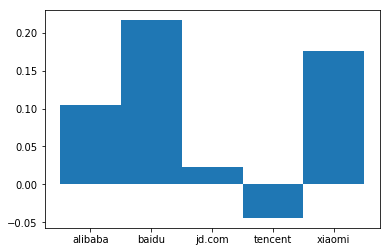

In [62]:
x, y = zip(*sorted_analysis)
width = 1
plt.bar(x, y, width, align='center')